# 1. Loading the data with root_pandas and making a plot with matplotlib

In this example, we load the $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ data and make a nice plot of the $B^0$ invariant mass with `matplotlib`.

First some imports of stuff we need:

In [9]:
from root_pandas import read_root
import matplotlib.pyplot as plt
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets
import numpy as np

#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

Here we load the data for each year and magnet polarity into a `pandas` DataFrame. We specify the variable we want to look at (`B0_M`) - this list can be added to in order to load more variables. You can also run the `read_root` command without giving a `columns` argument, which will load all of the `ROOT` file branches.

In [4]:
file_list = []
for y in years:
    for m in magnets:
        file_list.append(f"{loc.DATA}/data_90000000_{y}_{m}.root")
tree_name = "DecayTree"
vars = ["B0_M"]
df = read_root(file_list, tree_name, columns=vars)

Here we have loaded the `TTree` called `DecayTree` from a collection of `ROOT` files, one for each year and magnet. Note that the years and magnets are specified in `bd2dst3pi/definitions.py`. Loading in this way is similar to `TChain` in `ROOT`.

We can calculate some properties of the `B0_M` variable, like the mean and standard deviation:

In [6]:
mu = df["B0_M"].mean()
sigma = df["B0_M"].std()
print(f"B0_M mu = {mu:.2f}, B0_M sigma = {sigma:.2f}")

B0_M mu = 5275.54, B0_M sigma = 27.87


We are using a nice feature in Python 3 called `f-strings` here when printing. This lets you put a variable directly into a string by doing `{var}`. We specify the number of decimals by doing `{var:2f}`, where `2` gives us two decimal places.

Now we can make a plot of the $B^0$ mass. One handy way to quickly check a distribution is by doing:

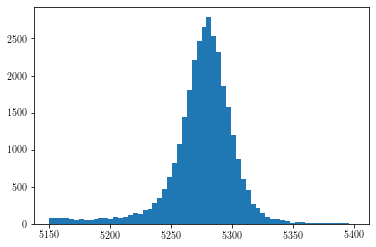

In [15]:
bin_width = 4
low = df["B0_M"].min()
high = df["B0_M"].max()
n_bins = int((high - low)/bin_width)
plt.hist(df["B0_M"], bins=n_bins)
plt.show()

To make a fancier plot, we can make a `numpy` histogram of the data and then plot it as an errorbar plot:

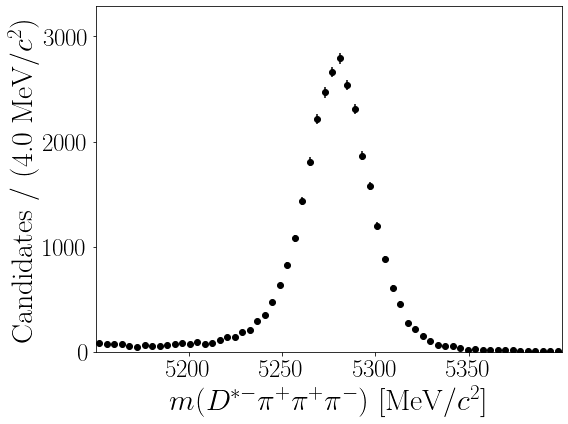

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

#Make the histogram, and get the bin centres and error on the counts in each bin
counts, bin_edges = np.histogram(df["B0_M"], n_bins, range=(low,high))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

#Plot the bin centres and counts in each bin
plt.errorbar(bin_centres, counts, yerr=err, fmt='o', color='k')

#Some plot style stuff

#Units for the x-axis (B0_M is in MeV)
units = "MeV/$c^2$"

#Set the x title
plt.xlabel("$m(D^{*-}\pi^+\pi^+\pi^-)$ [%s]" % units,fontsize=30)

#Set the y-title, which is number of candidates per bin
plt.ylabel(f"Candidates / ({bin_width:.1f} {units})", fontsize=30)

#Set lower and upper range of the x-axis
plt.xlim(low,high)

#Get the default y-limits, then redefine the plot to start at 0 and give it a bit more space on top (with the 1.1x)
ymin, ymax = plt.ylim()
plt.ylim(0.,ymax*1.1)

#Set the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=25)

#Remove any space not needed around the plot
plt.tight_layout()

plt.show()

#Save the plot as a PDF document into our PLOTS folder (output/plots as defined in bd2dst3pi/locations.py)
fig.savefig(f"{loc.PLOTS}/B0_M_data.pdf")

The data we are working with already has selection cuts applied, so you can see that the peak is very clean. There is some background, and we will work to fit this distribution as part of the project to measure the normalisation mode yield.

**Follow-up tasks**

- Can you add more variables and make plots of those? Try to do this in a nice way using loops and Python dictionaries.

- Can you also load the Monte Carlo in a similar way and plot it?

- Can you plot the data and MC on the same plots? Try using the `density=True` option in your histograms in order to make normalised data and MC histograms. They will then have the same area, and can be compared directly. 